<a href="https://colab.research.google.com/github/Buy-me-some-str/practice/blob/main/pytorch_03_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### библиотеки для компьютерного зрения:
* torchvision
* torchvision.datasets
* torchvision.models
* torchvision.transforms
* torch.utils.data.Dataset
* torch.utils.data.DataLoader

In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import models
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

### Импортируем датасет FashionMNIST


In [2]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [3]:
len(train_data), len(test_data)

(60000, 10000)

image, label

In [4]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [5]:
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [6]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [7]:
image, label = train_data[0]
print(f"Image shape:{image.shape}->[color_channels, height, width]")
print(f"Image label:{train_data.classes[label]}")

Image shape:torch.Size([1, 28, 28])->[color_channels, height, width]
Image label:Ankle boot


### Визуализируем данные

Image shapetorch.Size([1, 28, 28])


(-0.5, 27.5, 27.5, -0.5)

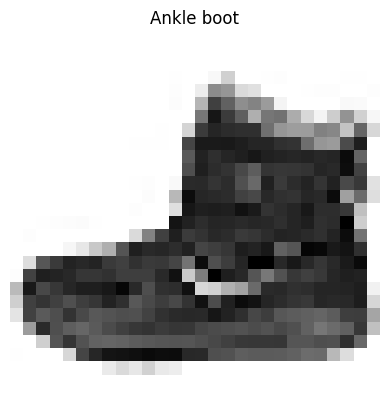

In [8]:
image, label = train_data[0]
print(f"Image shape{image.shape}")
plt.imshow(image.squeeze(), cmap="Greys")
plt.title(train_data.classes[label])
plt.axis(False)

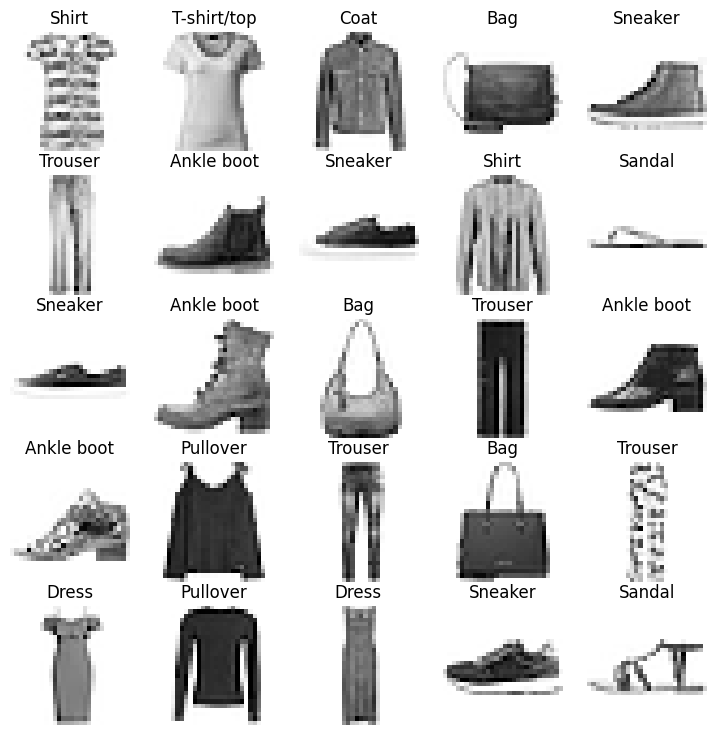

In [9]:
torch.manual_seed = 42
fig = plt.figure(figsize=(9, 9))
rows, cols = 5, 5
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="Greys")
    plt.title(train_data.classes[label])
    plt.axis(False)

### Подготовим данные 

In [10]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [11]:
BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f097dbd7640>,
 <torch.utils.data.dataloader.DataLoader at 0x7f097dbd7970>)

In [12]:
print(f"Dataloaders:{train_dataloader, test_dataloader}")
print(f"Lenght of train_dataloader:{len(train_dataloader)}")
print(f"Lenght of test_dataloader:{len(test_dataloader)}")

Dataloaders:(<torch.utils.data.dataloader.DataLoader object at 0x7f097dbd7640>, <torch.utils.data.dataloader.DataLoader object at 0x7f097dbd7970>)
Lenght of train_dataloader:1875
Lenght of test_dataloader:313


In [13]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size:torch.Size([1, 28, 28])
Label:6


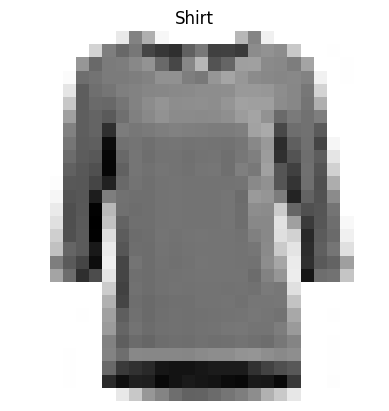

In [14]:
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
image, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(image.squeeze(), cmap="Greys")
plt.title(train_data.classes[label])
plt.axis(False)
print(f"Image size:{image.shape}")
print(f"Label:{label}")

### Создание модели

In [15]:
from numpy.ma.core import flatten_mask
flatten_model = nn.Flatten()

x = train_features_batch[0]
x.shape

output = flatten_model(x)
output.shape

torch.Size([1, 784])

In [16]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layers_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape)
        )
    def forward(self, x):
        return self.layers_stack(x).squeeze()

In [17]:
model_0 = FashionMNISTModelV0(input_shape=784,
                              hidden_units=10,
                              output_shape=len(train_data.classes))
model_0.to("cpu")
model_0

FashionMNISTModelV0(
  (layers_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [18]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0.forward(dummy_x)

tensor([-0.1505,  0.0877,  0.0704, -0.1991,  0.1010, -0.0579, -0.3476, -0.7608,
        -0.0792, -0.2486], grad_fn=<SqueezeBackward0>)

In [19]:
model_0.state_dict()

OrderedDict([('layers_stack.1.weight',
              tensor([[-0.0323, -0.0164, -0.0246,  ..., -0.0024, -0.0101,  0.0226],
                      [ 0.0141,  0.0230, -0.0169,  ..., -0.0114,  0.0334,  0.0055],
                      [ 0.0339,  0.0319, -0.0041,  ..., -0.0113,  0.0039,  0.0296],
                      ...,
                      [ 0.0290, -0.0230, -0.0056,  ...,  0.0075,  0.0243, -0.0354],
                      [-0.0097, -0.0070, -0.0036,  ...,  0.0216,  0.0300, -0.0257],
                      [-0.0082, -0.0068,  0.0333,  ...,  0.0082,  0.0113, -0.0175]])),
             ('layers_stack.1.bias',
              tensor([-0.0350,  0.0091, -0.0354,  0.0194,  0.0152,  0.0078,  0.0053,  0.0240,
                       0.0231, -0.0232])),
             ('layers_stack.2.weight',
              tensor([[-0.3133, -0.1640, -0.1060,  0.0620,  0.2049,  0.2883, -0.1651,  0.2687,
                       -0.1311,  0.1726],
                      [ 0.2050, -0.1606,  0.1099,  0.0460,  0.1860, -0.2969, 

In [20]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                             lr=0.1)

In [21]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
    print("helper_functions already exists")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("hepler_functions.py", "wb") as f:
        f.write(request.content)

In [22]:
from hepler_functions import accuracy_fn

### Создадим функцию для отслеживания скорости работы модели

In [23]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
    total_time = end-start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time
start_time = timer()
def make_smth():
    return 0
for i in range(0, 10000000):
    make_smth()
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu: 2.086 seconds


2.086415431999967

### Создади обучающий цикл

In [24]:
from tqdm.auto import tqdm

train_time_start_om_cpu = timer()
epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch{epoch}\n-------")
    train_loss = 0
    # цикл пакетной обработки
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        y_pred = model_0.forward(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch % 400 == 0:
            print(f"Batch {batch}: {batch * len(X)}/{len(train_dataloader.dataset)} samples")
    train_loss /= len(train_dataloader)
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            test_pred = model_0.forward(X_test)
            test_loss += loss_fn(test_pred, y_test)
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)
    print(f"\nTrain loss:{train_loss:.4f}|Test loss:{test_loss:.4f}|Test_acc:{test_acc:.2f}")   

train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start = train_time_start_om_cpu,
                                            end = train_time_end_on_cpu,
                                            device = str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch0
-------
Batch 0: 0/60000 samples
Batch 400: 12800/60000 samples
Batch 800: 25600/60000 samples
Batch 1200: 38400/60000 samples
Batch 1600: 51200/60000 samples

Train loss:0.5915|Test loss:0.5410|Test_acc:80.03
Epoch1
-------
Batch 0: 0/60000 samples
Batch 400: 12800/60000 samples
Batch 800: 25600/60000 samples
Batch 1200: 38400/60000 samples
Batch 1600: 51200/60000 samples

Train loss:0.4739|Test loss:0.5372|Test_acc:81.12
Epoch2
-------
Batch 0: 0/60000 samples
Batch 400: 12800/60000 samples
Batch 800: 25600/60000 samples
Batch 1200: 38400/60000 samples
Batch 1600: 51200/60000 samples

Train loss:0.4569|Test loss:0.5195|Test_acc:81.30
Train time on cpu: 39.730 seconds


### Создадим код независящий от устройства

In [25]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### Оценим модель

In [26]:
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            X = X.to(device)
            y = y.to(device)
            y_pred = model.forward(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device="cpu")
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.5195443034172058,
 'model_acc': 81.29992012779553}

### Создадим 2 модель

In [27]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layers_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape),
            nn.ReLU()
        )
    def forward(self, x: torch.Tensor):
        return self.layers_stack(x)

In [28]:
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(train_data.classes)).to(device)

In [29]:
next(model_1.parameters()).device

device(type='cuda', index=0)

In [30]:
from hepler_functions import accuracy_fn
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

### Функциональное обучение и улучшение циклов обучения и тестирования

In [31]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               optimizer: torch.optim.Optimizer,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    train_loss = 0
    train_acc = 0
    model.train()
    for batch, (X, y) in enumerate(data_loader):
        X = X.to(device)
        y = y.to(device)
        y_pred = model.forward(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch % 400 == 0:
            print(f"Batch {batch}: {batch* len(X)}/{len(data_loader.dataset)}samples.")
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss:{train_loss:.5f}|Train acc:{train_acc:.2f}%")

In [32]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for batch, (X, y) in enumerate(data_loader):
            X = X.to(device)
            y = y.to(device)
            test_pred = model.forward(X)
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                                 y_pred=test_pred.argmax(dim=1))
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss:{test_loss:.5f}|Test acc:{test_acc:.2f}%\n")

In [33]:
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch:{epoch}\n---------")
    train_step(model=model_1,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model=model_1,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end = train_time_end_on_gpu,
                                            device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
---------
Batch 0: 0/60000samples.
Batch 400: 12800/60000samples.
Batch 800: 25600/60000samples.
Batch 1200: 38400/60000samples.
Batch 1600: 51200/60000samples.
Train loss:0.64972|Train acc:76.80%
Test loss:0.53986|Test acc:81.36%

Epoch:1
---------
Batch 0: 0/60000samples.
Batch 400: 12800/60000samples.
Batch 800: 25600/60000samples.
Batch 1200: 38400/60000samples.
Batch 1600: 51200/60000samples.
Train loss:0.48703|Train acc:82.85%
Test loss:0.51641|Test acc:81.62%

Epoch:2
---------
Batch 0: 0/60000samples.
Batch 400: 12800/60000samples.
Batch 800: 25600/60000samples.
Batch 1200: 38400/60000samples.
Batch 1600: 51200/60000samples.
Train loss:0.45257|Train acc:83.87%
Test loss:0.48038|Test acc:83.22%

Train time on cuda: 35.388 seconds


In [34]:
total_train_time_model_1

35.38821379399974

In [35]:
model_1_results = eval_model(model=model_1,
                              data_loader=test_dataloader,
                              loss_fn=loss_fn,
                              accuracy_fn=accuracy_fn,
                              device=device)

  0%|          | 0/313 [00:00<?, ?it/s]

In [36]:
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.4803779125213623,
 'model_acc': 83.21685303514377}

In [37]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.5195443034172058,
 'model_acc': 81.29992012779553}

### Сверточная нейронная сеть

In [38]:
class FashionMNISTModelV2(nn.Module):
    """
    Модель основана на архитектуре TinyVGG
    """
    def __init__(self, 
                 input_shape,
                 hidden_units,
                 output_shape):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units * 7 * 7,
                      out_features=output_shape)
        )
    def forward(self, x):
        x = self.conv_block_1(x)
        #print(f"Output shape of conv_block_1: {x.shape}")
        x = self.conv_block_2(x)
        #print(f"Output shape of conv_block_2: {x.shape}")
        x = self.classifier(x)
        #print(f"Output shape of classifier: {x.shape}")
        return x

In [39]:

model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(train_data.classes)).to(device)

### Пошаговое прохождение Con2d и MaxPool2d

In [40]:
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]
print(f"Image batch shape: {image.shape}")
print(f"Single image shape: {test_image.shape}")


Image batch shape: torch.Size([1, 28, 28])
Single image shape: torch.Size([3, 64, 64])


In [41]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)

conv_output = conv_layer(test_image.unsqueeze(0))
conv_output.shape

torch.Size([1, 10, 62, 62])

In [42]:
test_image.shape

torch.Size([3, 64, 64])

In [43]:
max_pool_layer = nn.MaxPool2d(kernel_size=(3, 3))

test_image_throught_conv = conv_layer(test_image.unsqueeze(dim=0))

print(f"Shape after going throught conv_layer(): {test_image_throught_conv.shape}")

test_image_throught_conv_and_max_pool = max_pool_layer(test_image_throught_conv)

print(f"Shape after going throught conv_layer() and max_pool_layer(): {test_image_throught_conv_and_max_pool.shape}")

Shape after going throught conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going throught conv_layer() and max_pool_layer(): torch.Size([1, 10, 20, 20])


In [44]:
torch.manual_seed = 42

random_tensor = torch.rand(size=(1, 1, 4, 4))
print(f"random_tensor: {random_tensor.shape}")
max_pool_layer = nn.MaxPool2d(kernel_size=(2, 2))
max_pool_tensor = max_pool_layer(random_tensor)
print(f"max_pool_tensor: {max_pool_tensor.shape}")

print(f"random tensor: \n {random_tensor}")
print(f"max_pool_tensor: \n {max_pool_tensor}")

random_tensor: torch.Size([1, 1, 4, 4])
max_pool_tensor: torch.Size([1, 1, 2, 2])
random tensor: 
 tensor([[[[0.7233, 0.4321, 0.3952, 0.0497],
          [0.4855, 0.4909, 0.3675, 0.8989],
          [0.1316, 0.7254, 0.5002, 0.5536],
          [0.8918, 0.5726, 0.7856, 0.1936]]]])
max_pool_tensor: 
 tensor([[[[0.7233, 0.8989],
          [0.8918, 0.7856]]]])


### отладка

In [45]:
image = image.to(device)

model_2.forward(image.unsqueeze(0))

tensor([[-0.1048,  0.0111, -0.0701,  0.1081,  0.0587,  0.0556, -0.0052, -0.0469,
          0.0440,  0.0349]], device='cuda:0', grad_fn=<AddmmBackward0>)

### Обучим сверточную нейронную сеть

In [46]:
from hepler_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [47]:
torch.manual_seed = 42
torch.cuda.manual_seed = 42

from timeit import default_timer as timer
train_time_start_model_2 = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n----------------------")
    train_step(model=model_2,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model=model_2,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----------------------
Batch 0: 0/60000samples.
Batch 400: 12800/60000samples.
Batch 800: 25600/60000samples.
Batch 1200: 38400/60000samples.
Batch 1600: 51200/60000samples.
Train loss:0.55560|Train acc:79.94%
Test loss:0.35645|Test acc:87.73%

Epoch: 1
----------------------
Batch 0: 0/60000samples.
Batch 400: 12800/60000samples.
Batch 800: 25600/60000samples.
Batch 1200: 38400/60000samples.
Batch 1600: 51200/60000samples.
Train loss:0.33415|Train acc:88.06%
Test loss:0.34809|Test acc:86.82%

Epoch: 2
----------------------
Batch 0: 0/60000samples.
Batch 400: 12800/60000samples.
Batch 800: 25600/60000samples.
Batch 1200: 38400/60000samples.
Batch 1600: 51200/60000samples.
Train loss:0.29780|Train acc:89.37%
Test loss:0.32334|Test acc:88.45%

Train time on cuda: 40.895 seconds


In [48]:
model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3233407735824585,
 'model_acc': 88.44848242811501}

In [49]:
import pandas as pd

compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])

In [50]:
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]

In [51]:
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.519544,81.299920,39.730314
1,FashionMNISTModelV1,0.480378,83.216853,35.388214
2,FashionMNISTModelV2,0.323341,88.448482,40.895059


Text(0, 0.5, 'model')

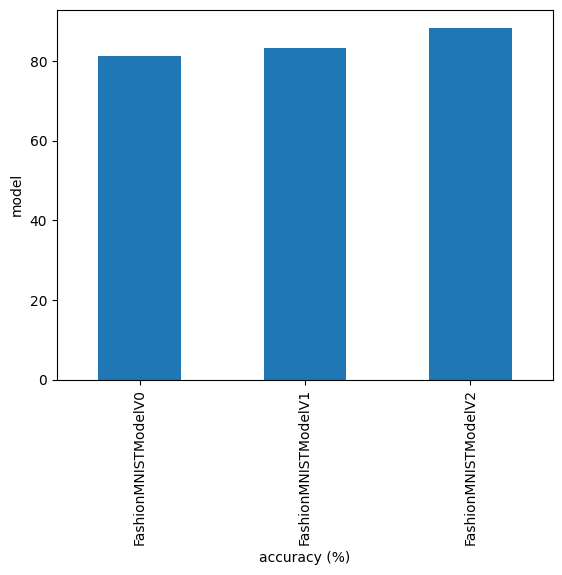

In [52]:
compare_results.set_index("model_name")["model_acc"].plot(kind="bar")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

In [53]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device=device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0).to(device)
            pred_logit = model.forward(sample)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
            pred_probs.append(pred_prob.cpu())
    return torch.stack(pred_probs)

In [54]:
import random
#random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)


Text(0.5, 1.0, 'Pullover')

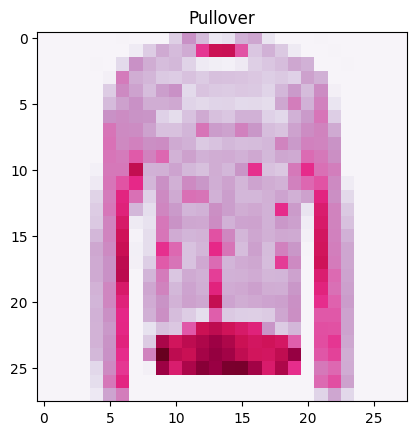

In [55]:
plt.imshow(test_samples[0].squeeze(dim=0), cmap="PuRd")
plt.title(test_data.classes[test_labels[0]])

In [56]:
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

In [57]:
pred_classes = pred_probs.argmax(dim=1)

In [58]:
test_data.classes[pred_classes[1]]

'Coat'

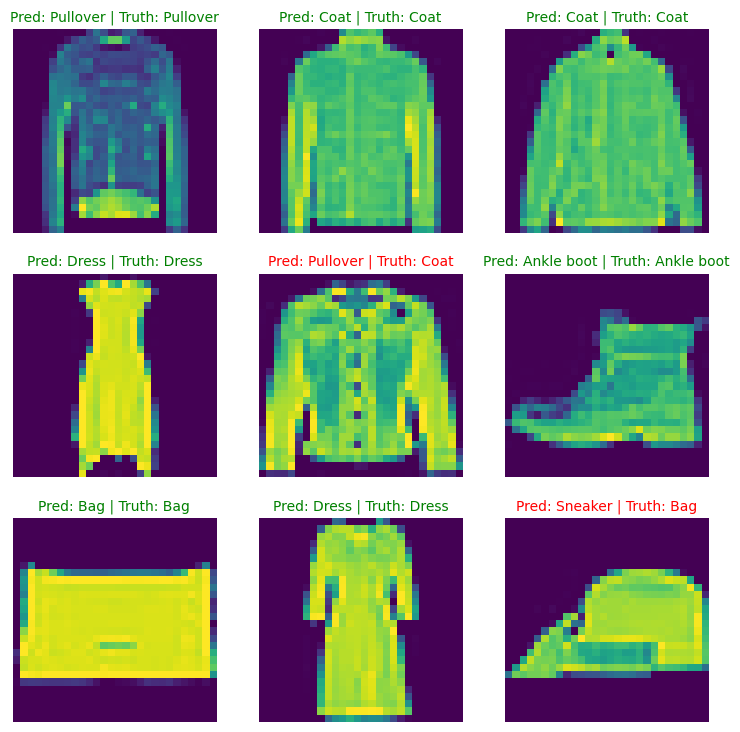

In [59]:
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(sample.squeeze())
    pred_label = test_data.classes[pred_classes[i]]
    truth_label = test_data.classes[test_labels[i]]
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c="g")
    else:
        plt.title(title_text, fontsize=10, c="r")
    plt.axis(False)

### Confusion matrix
лучший способо оценки классификационной модели

In [63]:
from torchmetrics import ConfusionMatrix
import mlxtend
from mlxtend.plotting import plot_confusion_matrix 
from tqdm.auto import tqdm 


In [61]:
mlxtend.__version__

'0.22.0'

In [62]:
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X,y in tqdm(test_dataloader, desc="Make predictions..."):
        X, y = X.to(device), y.to(device)
        y_logit = model_2.forward(X)
        y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
        y_preds.append(y_pred.cpu())
#print(y_preds)
y_preds_tensor = torch.cat(y_preds)
print(y_preds_tensor.size())

Make predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

torch.Size([10000])


In [70]:
confmat = ConfusionMatrix(num_classes=10,
                          task="multiclass")
confmat_tensor = confmat(preds=y_preds_tensor, 
                         target=test_data.targets)

In [71]:
confmat_tensor

tensor([[693,   4,  28,  53,   7,   1, 207,   0,   7,   0],
        [  8, 860,   7,  91,  27,   0,   5,   0,   2,   0],
        [ 13,   4, 765,  15, 105,   0,  94,   0,   4,   0],
        [ 18,  10,  12, 884,  28,   0,  42,   0,   6,   0],
        [  4,   7, 104,  54, 693,   0, 123,   0,  14,   1],
        [  1,   0,   0,   2,   0, 827,   5,  63,  71,  31],
        [ 89,   5,  86,  54,  77,   0, 676,   0,  13,   0],
        [  1,   0,   0,   0,   0,  25,   0, 937,   5,  32],
        [  7,   2,   5,  13,   3,   5,  35,   3, 927,   0],
        [  0,   0,   1,   2,   1,  15,   6, 137,  11, 827]])

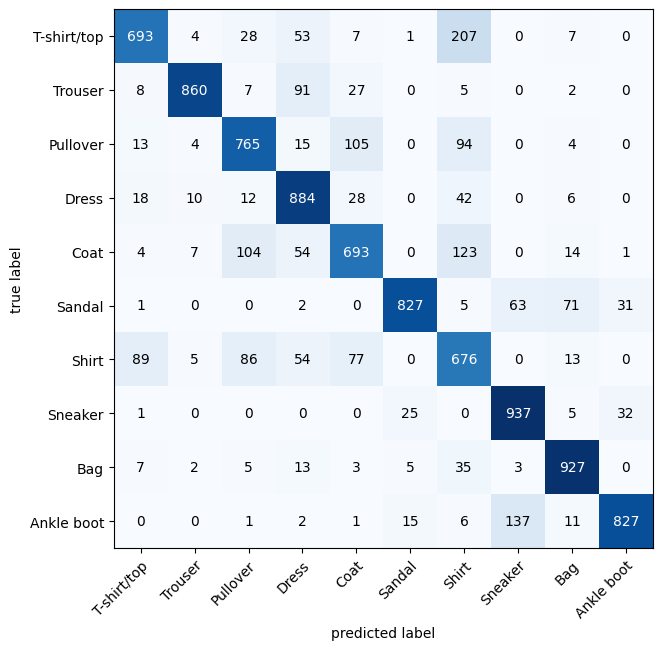

In [74]:
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names = test_data.classes,
    figsize=(10, 7)
)

### Сохраним нашу модель

In [76]:
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)


In [81]:
MODEL_NAME = "03_pytorch_computer_vision_model.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model.pth


### Выгрузим сохраненную модель

In [83]:
torch.manual_seed = 42
loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=10)
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [84]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3233407735824585,
 'model_acc': 88.44848242811501}

In [85]:
torch.manual_seed = 42

loaded_model_2_results = eval_model(model=loaded_model_2,
                                    data_loader=test_dataloader,
                                    loss_fn=loss_fn,
                                    accuracy_fn=accuracy_fn)
loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3233407735824585,
 'model_acc': 88.44848242811501}